In [1]:
# PyTorch imports
import torch 
import torch.nn as nn

# torchvision imports
import torchvision
from torchvision import datasets
import torchvision.transforms.v2 as transforms

# For visualization
import matplotlib.pyplot as plt

In [2]:
print("PyTorch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)

PyTorch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124


In [3]:
# transforms.ToTensor() is deprecated
# https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.ToTensor.html#torchvision.transforms.v2.ToTensor
# https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.Compose.html#torchvision.transforms.v2.Compose
# https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.ToImage.html#torchvision.transforms.v2.ToImage
# https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.ToDtype.html#torchvision.transforms.v2.ToDtype
dataset_transform = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(dtype=torch.float32, scale=True)
])

train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=dataset_transform,
    target_transform=None
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=dataset_transform,
    target_transform=None
)

In [4]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [5]:
image, label = train_dataset[0]

image, label

(Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
          0.0000, 0.0039, 0.0157, 0.0000,

In [6]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
train_dataset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# Labels of train data
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
print(f"Image shape {image.shape} as [num channels, height, width]")
print(f"Image label {train_dataset.classes[label]}")

Image shape torch.Size([1, 28, 28]) as [num channels, height, width]
Image label Ankle boot


Text(0.5, 1.0, 'Ankle boot')

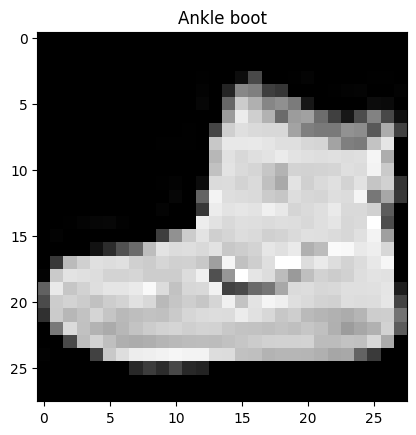

In [10]:
plt.figure()
# If single dimension for grayscale image not removed from shape, 
# TypeError: Invalid shape (1, 28, 28) for image data
# error will occur.
# Color channel should be last if image is RGB.
plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_dataset.classes[label])

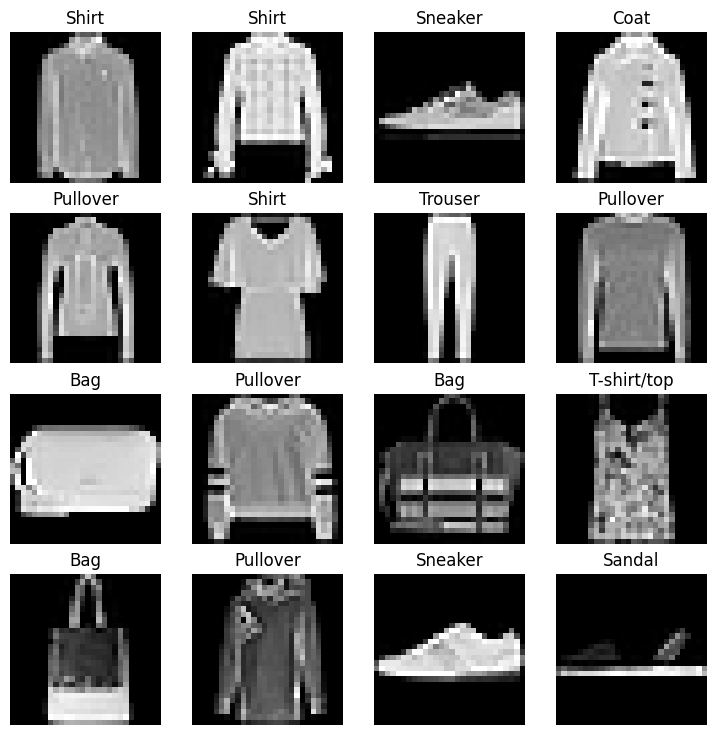

In [11]:
# use torch.manual_seed() for same outputs every time
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
  img, label = train_dataset[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(train_dataset.classes[label])
  plt.axis(False)

In [12]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [13]:
print(f"Train dataloader: {train_dataloader}")
print(f"Test dataloader: {test_dataloader}")

print(f"Train dataloader size: {len(train_dataloader)} for batch size of {BATCH_SIZE}.")
print(f"Test dataloader size: {len(test_dataloader)} for batch size of {BATCH_SIZE}.")

Train dataloader: <torch.utils.data.dataloader.DataLoader object at 0x0000020E1662AE90>
Test dataloader: <torch.utils.data.dataloader.DataLoader object at 0x0000020E15D9BE10>
Train dataloader size: 1875 for batch size of 32.
Test dataloader size: 313 for batch size of 32.


In [14]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

print(f"Train feature shape for batch: {train_features_batch.shape} -> [batch size, color channel, height, width] (NCHW)")
print(f"Train labels shape for batch: {train_labels_batch.shape}")

Train feature shape for batch: torch.Size([32, 1, 28, 28]) -> [batch size, color channel, height, width] (NCHW)
Train labels shape for batch: torch.Size([32])


(-0.5, 27.5, 27.5, -0.5)

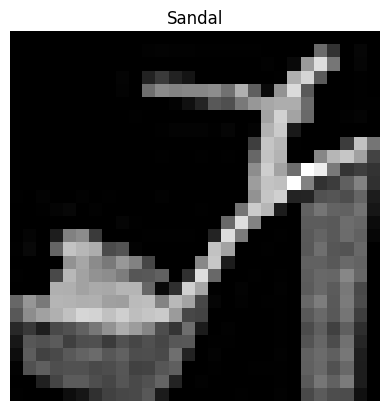

In [15]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(train_dataset.classes[label])
plt.axis(False)

baseline model
todo: explain flatten

In [16]:
class FashionMNISTModelv1(nn.Module):
    def __init__(self, in_size, hidden_units, out_size):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_size, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=out_size)
        )

    def forward(self, x):
        return self.layer_stack(x)


torch.manual_seed(7)
model1 = FashionMNISTModelv1(
    in_size=28*28,
    hidden_units=8,
    out_size=len(train_dataset.classes)
)

model1

FashionMNISTModelv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [17]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [18]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device=None):
    print(f"Elapsed time on device {device}: {end - start:4f} seconds.")

In [19]:
start_time = timer()

[i for i in range(int(1e6))]

end_time = timer()

print_train_time(start_time, end_time, "cpu")

Elapsed time on device cpu: 0.087024 seconds.


- loop for epochs
- loop for train batches and perform normal train steps, train loss calculated per batch
- loop for test batches and perform normal test steps, train loss calculated per batch

In [20]:
from tqdm.auto import tqdm
from helper_functions import accuracy_fn

# train loop

torch.manual_seed(7)

EPOCHS = 3

train_start_time_on_cpu = timer()

for epoch in tqdm(range(1, EPOCHS+1)):
    print(f"Epoch {epoch}:\n")
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(train_dataloader):
        # set model mode to train
        model1.train()
        
        # zero the gradient buffers
        optimizer.zero_grad()

        # forward pass
        y_preds = model1(X)

        # calculate the batch loss
        loss = loss_fn(y_preds, y)
        loss += train_loss 
        
        # optional - track accuracy
        train_acc += accuracy_fn(y, y_preds.argmax(dim=1))

        # backpropagation
        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # test loop
    test_loss, test_acc = 0, 0
    model1.eval()
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            test_preds = model1(X_test)

            test_loss += loss_fn(test_preds, y_test)

            test_acc += accuracy_fn(y_test, test_preds.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    
    print(
        f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}")

train_stop_time_on_cpu = timer()

print_train_time(train_start_time_on_cpu, train_stop_time_on_cpu, str(next(model1.parameters()).device))

d:\PyTorch\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1:

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:28<00:57, 28.54s/it]

Train Loss: 0.0000 | Train Acc: 78.87 | Test Loss: 0.4975 | Test Acc: 82.04
Epoch 2:

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:57<00:28, 28.66s/it]

Train Loss: 0.0000 | Train Acc: 82.99 | Test Loss: 0.5196 | Test Acc: 81.79
Epoch 3:

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [01:26<00:00, 28.88s/it]

Train Loss: 0.0000 | Train Acc: 83.83 | Test Loss: 0.4680 | Test Acc: 83.46
Elapsed time on device cpu: 86.640418 seconds.


In [21]:
def eval_model(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = "cpu"):
    """
    Evaluates a given PyTorch model on a provided dataset.

    Args:
        model (torch.nn.Module): The model to evaluate.
        dataloader (torch.utils.data.DataLoader): DataLoader providing the dataset to evaluate on.
        loss_fn (torch.nn.Module): Loss function to calculate the loss.
        accuracy_fn (function): Function to calculate the accuracy. Should accept `y_true` and `y_pred` as arguments.

    Returns:
        dict: A dictionary containing the model name, average loss, and average accuracy.
            - "model_name" (str): The name of the model class.
            - "loss" (float): The average loss over the dataset.
            - "accuracy" (float): The average accuracy over the dataset.
    """

    model.eval()
    model.to(device)

    loss, acc = 0, 0
    with torch.inference_mode():
        for X, y in tqdm(dataloader):
            X, y = X.to(device), y.to(device)

            # Make predictions
            y_preds = model(X)

            # Calculate the loss
            loss += loss_fn(y_preds, y)

            # Calculate the accuracy
            acc += accuracy_fn(y_true=y, 
                                 y_pred=y_preds.argmax(dim=1))

        # Calculate average loss
        loss /= len(dataloader)

        # Calculate average accuracy
        acc /= len(dataloader)

    return {"model_name": model.__class__.__name__, #only works if model is class
            "loss": loss.item(),
            "accuracy": acc}

In [22]:
eval_model(model=model1,
           dataloader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn)

100%|██████████| 313/313 [00:03<00:00, 84.12it/s]


{'model_name': 'FashionMNISTModelv1',
 'loss': 0.46795791387557983,
 'accuracy': 83.4564696485623}

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [24]:
class FashionMNISTModelv2(nn.Module):
    def __init__(self, in_size, out_size, hidden_units):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_size, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_size),
            nn.ReLU()
        )
    
    def forward(self, x):
        return self.layer_stack(x)

torch.manual_seed(7)
model2 = FashionMNISTModelv2(in_size=28*28,
                             out_size=len(train_dataset.classes),
                             hidden_units=8
                             ).to(device)

next(model2.parameters()).device

device(type='cuda', index=0)

In [25]:
def train_single_epoch(model: torch.nn.Module,
                       dataloader: torch.utils.data.DataLoader,
                       loss_fn: torch.nn.Module,
                       optimizer: torch.optim.Optimizer,
                       accuracy_fn,
                       device: None):
    
    """Trains model single epoch by given parameters."""
    
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(dataloader):
        # Put data on target device 
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (outputs the raw logits from the model)
        y_pred = model(X)
        
        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()
    
    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")


def test_single_epoch(model: torch.nn.Module,
                      dataloader: torch.utils.data.DataLoader,
                      loss_fn: torch.nn.Module,
                      accuracy_fn,
                      device: None):
    
    """Tests a model for single epoch."""

    test_loss, test_acc = 0, 0
  
    # Put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in dataloader:
            # Send the data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass (outputs raw logits)
            test_pred = model(X)

            # 2. Calculuate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 

        # Adjust metrics and print out
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


def train_model(model: torch.nn.Module,
                train_dataloader: torch.utils.data.DataLoader,
                test_dataloader: torch.utils.data.DataLoader,
                epochs: int,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: None):
    
    for epoch in range(1, epochs+1):
        print(f"Epoch {epoch}\n")

        model.to(device)

        train_single_epoch(model=model,
                           dataloader=train_dataloader,
                           loss_fn=loss_fn,
                           optimizer=optimizer,
                           accuracy_fn=accuracy_fn,
                           device=device)
        
        test_single_epoch(model=model,
                          dataloader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                          device=device)

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

In [27]:
train_start_time_on_gpu = timer()

torch.manual_seed(7)
torch.cuda.manual_seed(7)
train_model(model=model2,
            train_dataloader=train_dataloader,
            test_dataloader=test_dataloader,
            epochs=3,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

train_stop_time_on_gpu = timer()

print_train_time(train_start_time_on_gpu, train_stop_time_on_gpu, device)

Epoch 1

Train Loss: 1.00283 | Train Acc: 63.12%
Test loss: 0.77001 | Test acc: 71.79%

Epoch 2

Train Loss: 0.73487 | Train Acc: 73.04%
Test loss: 0.76459 | Test acc: 72.11%

Epoch 3

Train Loss: 0.70131 | Train Acc: 74.08%
Test loss: 0.70529 | Test acc: 73.85%

Elapsed time on device cuda: 99.429624 seconds.


In [28]:
eval_model(model2, test_dataloader, loss_fn, accuracy_fn, device)

100%|██████████| 313/313 [00:04<00:00, 75.59it/s]


{'model_name': 'FashionMNISTModelv2',
 'loss': 0.705292284488678,
 'accuracy': 73.85183706070288}

CNN

In [33]:
class FashionMNISTModelv3(nn.Module):
    def __init__(self, input_shape: int, units: int, output_shape: 
                 int, kernel_size: int|tuple, stride, padding):
        super().__init__()

        self.conv_0 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=units,
                      kernel_size=kernel_size, stride=stride, padding=padding),
            nn.ReLU(),
            nn.Conv2d(in_channels=units, out_channels=units,
                      kernel_size=kernel_size, stride=stride, padding=padding),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_1 = nn.Sequential(
             nn.Conv2d(in_channels=units, out_channels=units,
                      kernel_size=kernel_size, stride=stride, padding=padding),
            nn.ReLU(),
            nn.Conv2d(in_channels=units, out_channels=units,
                      kernel_size=kernel_size, stride=stride, padding=padding),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=units*7*7, out_features=output_shape),
            # nn.LazyLinear(output_shape) # Linear output can be calculated in runtime
            # or in forwerd method.
            # self.fc = None 
            # (forward method)
            # if self.fc is None:
            #     # Dynamically create the linear layer based on the feature size
            #     self.fc = nn.Linear(x.size(1), 10)
            #     x = self.fc(x)
            # or just calculate yourself
            # or just print out shape in forward method 
        )

    def forward(self, x):
        x = self.conv_0(x)
        # print(x.shape)
        x = self.conv_1(x)
        # print(x.shape)
        x = self.classifier(x)

        return x

In [34]:
torch.manual_seed(7)
torch.cuda.manual_seed(7)

model3 = FashionMNISTModelv3(input_shape=1, # number of color channels
                             units=10,
                             output_shape=len(train_dataset.classes),
                             kernel_size=3,
                             stride=1,
                             padding=1
                             )

In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)

train

In [36]:
train_cnn_start_time = timer()

torch.manual_seed(7)
torch.cuda.manual_seed(7)

train_model(model=model3, 
            train_dataloader=train_dataloader, 
            test_dataloader=test_dataloader, 
            epochs=3,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

train_cnn_stop_time = timer()

print_train_time(train_cnn_start_time, train_cnn_stop_time, device)

Epoch 1

Train Loss: 0.63577 | Train Acc: 77.04%
Test loss: 0.41110 | Test acc: 84.91%

Epoch 2

Train Loss: 0.36051 | Train Acc: 87.01%
Test loss: 0.34249 | Test acc: 87.42%

Epoch 3

Train Loss: 0.31822 | Train Acc: 88.63%
Test loss: 0.33528 | Test acc: 87.87%

Elapsed time on device cuda: 107.005204 seconds.
